# **Lab 17: Noisy Simulations and Benchmarking**
---

### **Description**
In this week's lab, we will see how to run noisy simulations and characterize the effects of noise using the swap test.

<br>

### **Structure**
**Part 1**: [Noisy Simulations](#p1)
> **Part 1.1**: [Adding General Noise](#p1.1)

> **Part 1.2**: [Appending Noise to a Specific Moment](#p1.2)


**Part 2**: [Noise Characterization with the Swap Test](#p2)

> **Part 2.1**: [Calculating Fidelity with the Swap Test](#p2.1)

> **Part 2.2**: [Characterizing Noise with the Swap Test](#p2.1)


<br>

### **Learning Objectives**
By the end of this lab, we will:
* Recognize how to run simulations in cirq with noise throughout a circuit and at specific moments of a circuit.
* Recognize how to use the swap test to measure fidelity.
* Recognize how to use the swap test to characterize noise in a circuit.

<br>

### **Resources**
* [Noisy Simulations Cheat Sheet
](https://docs.google.com/document/d/1Ex2m3dp5-_z8XN8EiBv6PUptHWrTLDpsKYU662oTy4A/edit#heading=h.exb19quwqzr9)

* [Cirq Cheat Sheet](https://docs.google.com/document/d/1j0vEwtS6fK-tD1DWAPry4tJdxEiq8fwMtXuYNGRhK_M)


<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
*import random
import matplotlib.pyplot as plt
import numpy as np

def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]
plt.rcParams.update({'font.size': 8})

try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install cirq --quiet
    import cirq
    print("installed cirq.")

installing cirq...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 826.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.5 MB/s eta 0:00:00
     ━

<a name="p1"></a>

---
## **Part 1: Noisy Simulations**
---

In this section, we will explore two different ways to perform noisy simulations.

<a name="p1.1"></a>

---

### **Part 1.1: Adding General Noise**

---

In this section, we will see how to simulate noise by adding it generally to the circuit using the `.with_noise(...)` method.

<br>

**Run the code below to create the circuit we will be using for the first few problems.**

In [ ]:
# Create qubits and circuit
qubits = cirq.NamedQubit.range(2, prefix = 'q')
circuit = cirq.Circuit()

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.measure(qubits))

#### **Problem #1.1.1**

**Together**, let's use simulate this circuit with a 5% chance of depolarizing noise.

In [ ]:
# Define a noise model
noise = cirq.depolarize(# COMPLETE THIS CODE

# Create a simulator that uses the noise model
simulator = cirq.Simulator()

# Simulate the circuit
result = simulator.run(circuit.with_noise(# COMPLETE THIS CODE

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = '5% Depolarization', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

##### **Solution**

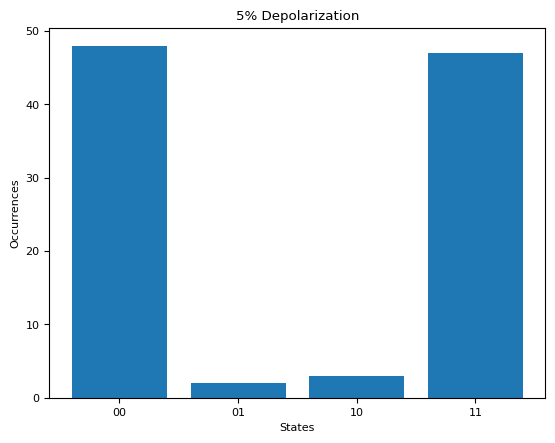

In [ ]:
# Define a noise model
noise = cirq.depolarize(0.05)

# Create a simulator that uses the noise model
simulator = cirq.Simulator()

# Simulate the circuit
result = simulator.run(circuit.with_noise(noise), repetitions=100)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = '5% Depolarization', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

#### **Problem #1.1.2**

**Independently**, simulate this circuit with a 25% chance of depolarizing noise.

In [ ]:
# Define a noise model
noise = cirq.depolarize(# COMPLETE THIS CODE

# Create a simulator that uses the noise model
simulator = cirq.Simulator()

# Simulate the circuit
result = simulator.run(# COMPLETE THIS CODE

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = '25% Depolarization', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

##### **Solution**

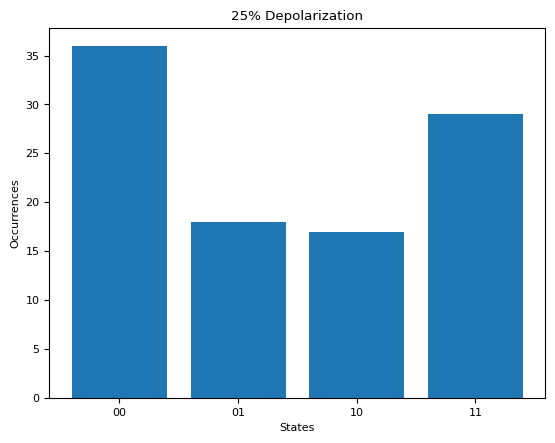

In [ ]:
# Define a noise model
noise = cirq.depolarize(0.25)

# Create a simulator that uses the noise model
simulator = cirq.Simulator()

# Simulate the circuit
result = simulator.run(circuit.with_noise(noise), repetitions=100)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = '25% Depolarization', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

#### **Problem #1.1.3**

**Independently**, simulate this circuit with a 100% chance of depolarizing noise.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

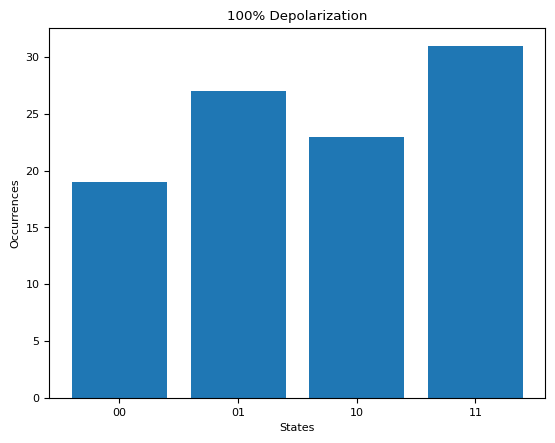

In [ ]:
# Define a noise model
noise = cirq.depolarize(1.0)

# Create a simulator that uses the noise model
simulator = cirq.Simulator()

# Simulate the circuit
result = simulator.run(circuit.with_noise(noise), repetitions=100)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = '100% Depolarization', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

<a name="p1.2"></a>

---

### **Part 1.2: Appending Noise to a Specific Moment**

---

In this section, we will see how to simulate noise by appending noise to a specific moment in a circuit. This leaves the rest of the circuit are completely noise free. This offers more granular, precise control over the noise, but tends to be less realistic.

#### **Problem #1.2.1**

**Together**, let's simulate this circuit with a 100% chance of depolarizing noise on just $q_0$ before applying the H gate.

In [ ]:
# Define a noise model
noise = # COMPLETE THIS CODE


# Create qubits and circuit
qubits = cirq.NamedQubit.range(2, prefix = 'q')
circuit = cirq.Circuit()

circuit.append(noise.on_each(# COMPLETE THIS CODE
circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.measure(qubits))

print(circuit)

In [ ]:
# Create a simulator that uses the noise model
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

##### **Solution**

In [ ]:
# Define a noise model
noise = cirq.depolarize(1.0)


# Create qubits and circuit
qubits = cirq.NamedQubit.range(2, prefix = 'q')
circuit = cirq.Circuit()

circuit.append(noise.on_each(qubits[0]))
circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.measure(qubits))

print(circuit)

q0: ───D(1)───H───@───M───
                  │   │
q1: ──────────────X───M───


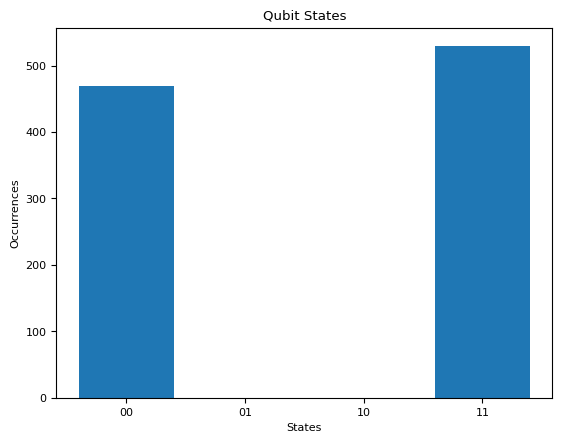

In [ ]:
# Create a simulator that uses the noise model
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

#### **Problem #1.2.2**

**Independently**, simulate this circuit with a 100% chance of depolarizing noise on just $q_0$ after applying the H gate and before applying the CNOT gate.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
# Define a noise model
noise = cirq.depolarize(1.0)


# Create qubits and circuit
qubits = cirq.NamedQubit.range(2, prefix = 'q')
circuit = cirq.Circuit()

circuit.append(cirq.H(qubits[0]))
circuit.append(noise.on_each(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.measure(qubits))

print(circuit)

q0: ───H───D(1)───@───M───
                  │   │
q1: ──────────────X───M───


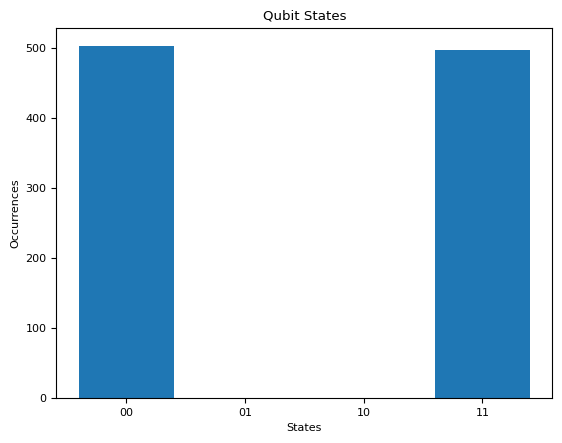

In [ ]:
# Create a simulator that uses the noise model
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

#### **Problem #1.2.3**

**Independently**, simulate this circuit with a 100% chance of depolarizing noise on just $q_0$ after the CNOT gate, but before the measurement.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
# Define a noise model
noise = cirq.depolarize(1.0)


# Create qubits and circuit
qubits = cirq.NamedQubit.range(2, prefix = 'q')
circuit = cirq.Circuit()

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(noise.on_each(qubits[0]))
circuit.append(cirq.measure(qubits))

print(circuit)

q0: ───H───@───D(1)───M───
           │          │
q1: ───────X──────────M───


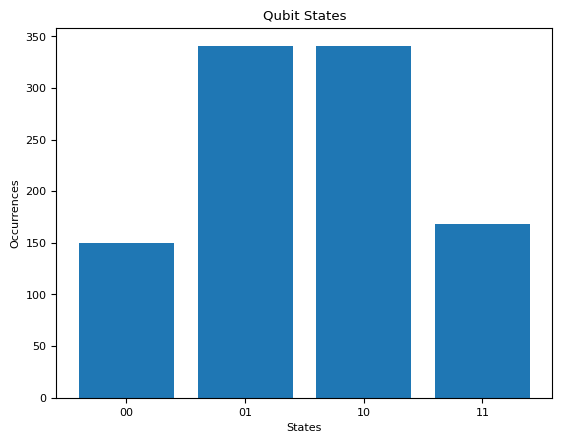

In [ ]:
# Create a simulator that uses the noise model
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

<a name="p2"></a>

---
## **Part 2: Noise Characterization with the Swap Test**
---

In this section, we will see how to perform a swap test to calculate fidelity generally and use it specifically to characterize the noise present in a circuit.

<a name="p2.1"></a>

---

### **Part 2.1: Calculating Fidelity with the Swap Test**

---

#### **Problem #2.1.1**

**Together**, let's see how to implement a swap test for two states: $|0\rangle$ and $|1\rangle$. We will do this in four steps:

1. Prepare 2 qubits in the given states and 1 ancilla qubit in the $|0\rangle$ state.

2. Append the swap test circuit.

3. Run the circuit.

4. Calculate the fidelity.

##### **1. Prepare 2 qubits in the given states and 1 ancilla qubit in the $|0\rangle$ state.**

Specifically,
* Put $q_0$ into the $|0\rangle$ state.
* Put $q_1$ into the $|1\rangle$ state.
* Put $\text{ancilla}$ into the $|0\rangle$ state.

In [ ]:
# Create qubits
q0 = cirq.NamedQubit('state 0')
q1 = cirq.NamedQubit('state 1')
ancilla = cirq.NamedQubit('anc')


# Prepare the qubit states
circuit_0 = cirq.Circuit()
circuit_0.append(# COMPLETE THIS CODE

circuit_1 = cirq.Circuit()
circuit_1.append(# COMPLETE THIS CODE

circuit = # COMPLETE THIS CODE

###### **Solution**


In [ ]:
# Create qubits
q0 = cirq.NamedQubit('state 0')
q1 = cirq.NamedQubit('state 1')
ancilla = cirq.NamedQubit('anc')


# Prepare the qubit states
circuit_0 = cirq.Circuit()
circuit_0.append(cirq.I(q0))

circuit_1 = cirq.Circuit()
circuit_1.append(cirq.X(q1))

circuit = circuit_0 + circuit_1

##### **2. Append the swap test circuit.**

This is always the same circuit with the following steps:

1. Apply an H gate on the ancilla.
2. Apply a *controlled* swap gate with the ancilla as the control and the two other qubits as the targets.
3. Apply an H gate on the ancilla.
4. Measure the ancilla qubit.

In [ ]:
# Put ancilla in superposition
circuit.append(# COMPLETE THIS CODE

# Controlled-Swap controlled by ancilla and targeting q0 and q1
circuit.append(cirq.CSWAP(# COMPLETE THIS CODE

# Apply an H gate on the ancilla.
circuit.append(# COMPLETE THIS CODE

# Measure ancilla
circuit.append(cirq.measure(ancilla))


circuit

###### **Solution**


In [ ]:
# Put ancilla in superposition
circuit.append(cirq.H(ancilla))

# Controlled-Swap controlled by ancilla and targeting q0 and q1
circuit.append(cirq.CSWAP(ancilla, q0, q1))

# Apply an H gate on the ancilla.
circuit.append(cirq.H(ancilla))

# Measure ancilla
circuit.append(cirq.measure(ancilla))

circuit

anc: ───────H───────@───H───M───
                    │
state 0: ───I───────×───────────
                    │
state 1: ───────X───×───────────

##### **3. Run the circuit.**

Now, run the circuit 1000 times using a simulator.

In [ ]:
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=# COMPLETE THIS CODE
result

###### **Solution**


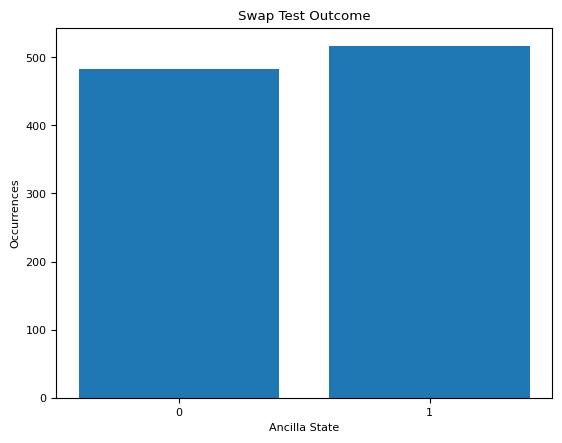

In [ ]:
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Swap Test Outcome', xlabel = 'Ancilla State', ylabel = 'Occurrences', tick_label=binary_labels(1))
plt.show()

##### **4. Calculate the fidelity.**

Typically, we use the swap test measurements to calculate fidelity by applying the following equation: $\mathbf{\text{fidelity} = 1 - 2*\text{prob}(0)}$.

In [ ]:
prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])

fidelity = # COMPLETE THIS CODE

fidelity

###### **Solution**


In [ ]:
prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])

fidelity = 1 - 2*prob_0

fidelity

-0.03400000000000003

#### **Problem #2.1.2**

**Independently**, implement a swap test for two states: $|1\rangle$ and $|1\rangle$, following our four steps:

1. Prepare 2 qubits in the given states and 1 ancilla qubit in the $|0\rangle$ state.

2. Append the swap test circuit.

3. Run the circuit.

4. Calculate the fidelity.

##### **1. Prepare 2 qubits in the given states and 1 ancilla qubit in the $|0\rangle$ state.**

Specifically,
* Put $q_0$ into the $|1\rangle$ state.
* Put $q_1$ into the $|1\rangle$ state.
* Put $\text{ancilla}$ into the $|0\rangle$ state.

In [ ]:
# Create qubits
q0 = cirq.NamedQubit('state 0')
q1 = cirq.NamedQubit('state 1')
ancilla = cirq.NamedQubit('anc')


# Prepare the qubit states
circuit_0 = cirq.Circuit()
circuit_0.append(# COMPLETE THIS CODE

circuit_1 = cirq.Circuit()
circuit_1.append(# COMPLETE THIS CODE

circuit = # COMPLETE THIS CODE

###### **Solution**


In [ ]:
# Create qubits
q0 = cirq.NamedQubit('state 0')
q1 = cirq.NamedQubit('state 1')
ancilla = cirq.NamedQubit('anc')


# Prepare the qubit states
circuit_0 = cirq.Circuit()
circuit_0.append(cirq.X(q0))

circuit_1 = cirq.Circuit()
circuit_1.append(cirq.X(q1))

circuit = circuit_0 + circuit_1

##### **2. Append the swap test circuit.**

This is always the same circuit with the following steps:

1. Put the ancilla qubit into superposition.
2. Apply a *controlled* swap gate with the ancilla as the control and the two other qubits as the targets.
3. Take the ancilla qubit out of superposition.
4. Measure the ancilla qubit.

In [ ]:
# Put ancilla in superposition
circuit.append(# COMPLETE THIS CODE

# Controlled-Swap controlled by ancilla and targeting q0 and q1
circuit.append(# COMPLETE THIS CODE

# Apply an H gate on the ancilla.
circuit.append(# COMPLETE THIS CODE

# Measure ancilla
circuit.append(# COMPLETE THIS CODE


circuit

###### **Solution**


In [ ]:
# Put ancilla in superposition
circuit.append(cirq.H(ancilla))

# Controlled-Swap controlled by ancilla and targeting q0 and q1
circuit.append(cirq.CSWAP(ancilla, q0, q1))

# Apply an H gate on the ancilla.
circuit.append(cirq.H(ancilla))

# Measure ancilla
circuit.append(cirq.measure(ancilla))

circuit

anc: ───────H───────@───H───M───
                    │
state 0: ───X───────×───────────
                    │
state 1: ───────X───×───────────

##### **3. Run the circuit.**

Now, run the circuit 1000 times using a simulator.

In [ ]:
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=# COMPLETE THIS CODE
result

###### **Solution**


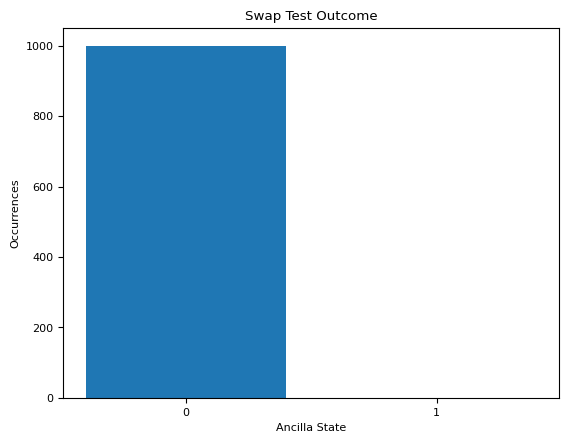

In [ ]:
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Swap Test Outcome', xlabel = 'Ancilla State', ylabel = 'Occurrences', tick_label=binary_labels(1))
plt.show()

##### **4. Calculate the fidelity.**

Typically, we use the swap test measurements to calculate fidelity by applying the following equation: $\mathbf{\text{fidelity} = 1 - 2*\text{prob}(0)}$.

In [ ]:
prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])

fidelity = # COMPLETE THIS CODE

fidelity

###### **Solution**


In [ ]:
prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])

fidelity = 1 - 2*prob_0

fidelity

1.0

#### **Problem #2.1.3**

**Independently**, implement a swap test for two states: $|1\rangle$ and $|+\rangle$, following our four steps:

1. Prepare 2 qubits in the given states and 1 ancilla qubit in the $|0\rangle$ state.

2. Append the swap test circuit.

3. Run the circuit.

4. Calculate the fidelity.

##### **1. Prepare 2 qubits in the given states and 1 ancilla qubit in the $|0\rangle$ state.**

Specifically,
* Put $q_0$ into the $|1\rangle$ state.
* Put $q_1$ into the $|+\rangle$ state.
* Put $\text{ancilla}$ into the $|0\rangle$ state.

In [ ]:
# COMPLETE THIS CODE

###### **Solution**


In [ ]:
# Create qubits
q0 = cirq.NamedQubit('state 0')
q1 = cirq.NamedQubit('state 1')
ancilla = cirq.NamedQubit('anc')


# Prepare the qubit states
circuit_0 = cirq.Circuit()
circuit_0.append(cirq.X(q0))

circuit_1 = cirq.Circuit()
circuit_1.append(cirq.H(q1))

circuit = circuit_0 + circuit_1

##### **2. Append the swap test circuit.**

This is always the same circuit with the following steps:

1. Put the ancilla qubit into superposition.
2. Apply a *controlled* swap gate with the ancilla as the control and the two other qubits as the targets.
3. Take the ancilla qubit out of superposition.
4. Measure the ancilla qubit.

In [ ]:
# COMPLETE THIS CODE

###### **Solution**


In [ ]:
# Put ancilla in superposition
circuit.append(cirq.H(ancilla))

# Controlled-Swap controlled by ancilla and targeting q0 and q1
circuit.append(cirq.CSWAP(ancilla, q0, q1))

# Apply an H gate on the ancilla.
circuit.append(cirq.H(ancilla))

# Measure ancilla
circuit.append(cirq.measure(ancilla))

circuit

anc: ───────H───────@───H───M───
                    │
state 0: ───X───────×───────────
                    │
state 1: ───────H───×───────────

##### **3. Run the circuit.**

Now, run the circuit 1000 times using a simulator.

In [ ]:
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=# COMPLETE THIS CODE
result

###### **Solution**


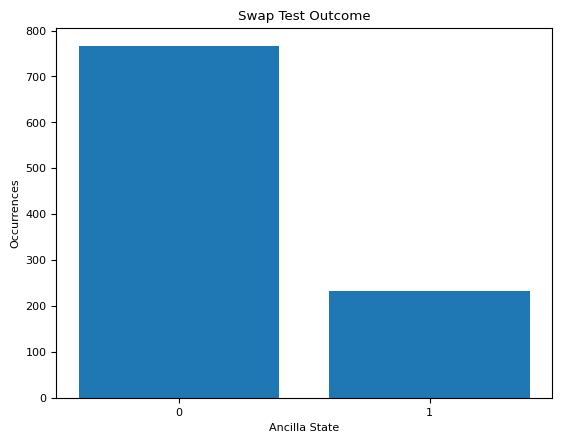

In [ ]:
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Swap Test Outcome', xlabel = 'Ancilla State', ylabel = 'Occurrences', tick_label=binary_labels(1))
plt.show()

##### **4. Calculate the fidelity.**

Typically, we use the swap test measurements to calculate fidelity by applying the following equation: $\mathbf{\text{fidelity} = 1 - 2*\text{prob}(0)}$.

In [ ]:
prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])

fidelity = # COMPLETE THIS CODE

fidelity

###### **Solution**


In [ ]:
prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])

fidelity = 1 - 2*prob_0

fidelity

0.534

#### **Problem #2.1.4**

**Independently**, combine these steps exactly as you have them from Problem #2.1.3 into one large cell below.

In [ ]:
# 1. PREPARE QUBITS
#===================
# COMPLETE THIS CODE


# 2. SWAP TEST CIRCUIT
#======================
# COMPLETE THIS CODE



# 3. RUN CIRCUIT
#================
# COMPLETE THIS CODE



# 4. CALCULATE FIDELITY
#=======================
# COMPLETE THIS CODE


fidelity

###### **Solution**

In [ ]:
# 1. PREPARE QUBITS
#===================
# Create qubits
q0 = cirq.NamedQubit('state 0')
q1 = cirq.NamedQubit('state 1')
ancilla = cirq.NamedQubit('anc')

# Prepare the given states
circuit_0 = cirq.Circuit()
circuit_0.append(cirq.X(q0))

circuit_1 = cirq.Circuit()
circuit_1.append(cirq.H(q1))


circuit = circuit_0 + circuit_1



# 2. SWAP TEST CIRCUIT
#======================
# Put ancilla in superposition
circuit.append(cirq.H(ancilla))

# Controlled-Swap controlled by ancilla and targeting q0 and q1
circuit.append(cirq.CSWAP(ancilla, q0, q1))

# Apply an H gate on the ancilla.
circuit.append(cirq.H(ancilla))

# Measure ancilla
circuit.append(cirq.measure(ancilla))



# 3. RUN CIRCUIT
#================
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)



# 4. CALCULATE FIDELITY
#=======================
prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])
fidelity = 1 - 2*prob_0
fidelity

0.488

<a name="p2.2"></a>

---

### **Part 2.2: Characterizing Noise with the Swap Test**

---


In this section, we will apply what we learned above to characterize the effects of noise using swap tests.

#### **Problem #2.2.1**

**Together**, let's calculate the fidelity of $q_0$ in our typical "ideal" $|0\rangle$ state (meaning there's no noise) and $q_1$ in a $|0\rangle$ state prepared with a 5% chance of depolarization.

In [ ]:
# 1. PREPARE QUBITS
#===================
# Create qubits
q0 = cirq.NamedQubit('state 0')
q1 = cirq.NamedQubit('state 1')
ancilla = cirq.NamedQubit('anc')

# Prepare the given states
circuit_0 = cirq.Circuit()
circuit_0.append(cirq.I(q0))

circuit_1 = cirq.Circuit()
circuit_1.append(cirq.I(q1))


noise = cirq.depolarize(# COMPLETE THIS CODE
circuit = circuit_0 + circuit_1.with_noise(# COMPLETE THIS CODE



# 2. SWAP TEST CIRCUIT
#======================
# Put ancilla in superposition
circuit.append(cirq.H(ancilla))

# Controlled-Swap controlled by ancilla and targeting q0 and q1
circuit.append(cirq.CSWAP(ancilla, q0, q1))

# Apply an H gate on the ancilla.
circuit.append(cirq.H(ancilla))

# Measure ancilla
circuit.append(cirq.measure(ancilla))



# 3. RUN CIRCUIT
#================
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)



# 4. CALCULATE FIDELITY
#=======================
prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])
fidelity = 1 - 2*prob_0
fidelity

###### **Solution**

In [ ]:
# 1. PREPARE QUBITS
#===================
# Create qubits
q0 = cirq.NamedQubit('state 0')
q1 = cirq.NamedQubit('state 1')
ancilla = cirq.NamedQubit('anc')

# Prepare the given states
circuit_0 = cirq.Circuit()
circuit_0.append(cirq.I(q0))

circuit_1 = cirq.Circuit()
circuit_1.append(cirq.I(q1))


noise = cirq.depolarize(0.05)
circuit = circuit_0 + circuit_1.with_noise(noise)



# 2. SWAP TEST CIRCUIT
#======================
# Put ancilla in superposition
circuit.append(cirq.H(ancilla))

# Controlled-Swap controlled by ancilla and targeting q0 and q1
circuit.append(cirq.CSWAP(ancilla, q0, q1))

# Apply an H gate on the ancilla.
circuit.append(cirq.H(ancilla))

# Measure ancilla
circuit.append(cirq.measure(ancilla))



# 3. RUN CIRCUIT
#================
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)



# 4. CALCULATE FIDELITY
#=======================
prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])
fidelity = 1 - 2*prob_0
fidelity

0.978

#### **Problem #2.2.2**

**Together**, let's calculate the fidelity of $q_0$ in our typical "ideal" $|0\rangle$ state (meaning there's no noise) and $q_1$ in a $|0\rangle$ state prepared with a 50% chance of depolarization.

In [ ]:
# 1. PREPARE QUBITS
#===================
# Create qubits
q0 = cirq.NamedQubit('state 0')
q1 = cirq.NamedQubit('state 1')
ancilla = cirq.NamedQubit('anc')

# Prepare the given states
circuit_0 = cirq.Circuit()
circuit_0.append(cirq.I(q0))

circuit_1 = cirq.Circuit()
circuit_1.append(cirq.I(q1))


noise = cirq.depolarize(# COMPLETE THIS CODE
circuit = circuit_0 + circuit_1.with_noise(# COMPLETE THIS CODE



# 2. SWAP TEST CIRCUIT
#======================
# Put ancilla in superposition
circuit.append(cirq.H(ancilla))

# Controlled-Swap controlled by ancilla and targeting q0 and q1
circuit.append(cirq.CSWAP(ancilla, q0, q1))

# Apply an H gate on the ancilla.
circuit.append(cirq.H(ancilla))

# Measure ancilla
circuit.append(cirq.measure(ancilla))



# 3. RUN CIRCUIT
#================
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)



# 4. CALCULATE FIDELITY
#=======================
prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])
fidelity = 1 - 2*prob_0
fidelity

###### **Solution**

In [ ]:
# 1. PREPARE QUBITS
#===================
# Create qubits
q0 = cirq.NamedQubit('state 0')
q1 = cirq.NamedQubit('state 1')
ancilla = cirq.NamedQubit('anc')

# Prepare the given states
circuit_0 = cirq.Circuit()
circuit_0.append(cirq.I(q0))

circuit_1 = cirq.Circuit()
circuit_1.append(cirq.I(q1))


noise = cirq.depolarize(0.5)
circuit = circuit_0 + circuit_1.with_noise(noise)



# 2. SWAP TEST CIRCUIT
#======================
# Put ancilla in superposition
circuit.append(cirq.H(ancilla))

# Controlled-Swap controlled by ancilla and targeting q0 and q1
circuit.append(cirq.CSWAP(ancilla, q0, q1))

# Apply an H gate on the ancilla.
circuit.append(cirq.H(ancilla))

# Measure ancilla
circuit.append(cirq.measure(ancilla))



# 3. RUN CIRCUIT
#================
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)



# 4. CALCULATE FIDELITY
#=======================
prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])
fidelity = 1 - 2*prob_0
fidelity

0.652

#### **Problem #2.2.3**

**Together**, let's use a loop to run the experiments from above for the depolarization probabilities given by running the first below. **NOTE**: The only part we need to complete is specifying the exact noise model used in each iteration.

In [ ]:
depol_probabilities = np.linspace(0, 1, 20)
depol_probabilities

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [ ]:
fidelities = []

for prob in depol_probabilities:

  # 1. PREPARE QUBITS
  #===================
  # Create qubits
  q0 = cirq.NamedQubit('state 0')
  q1 = cirq.NamedQubit('state 1')
  ancilla = cirq.NamedQubit('anc')

  # Prepare the given states
  circuit_0 = cirq.Circuit()
  circuit_0.append(cirq.I(q0))

  circuit_1 = cirq.Circuit()
  circuit_1.append(cirq.I(q1))


  noise = # COMPLETE THIS CODE
  circuit = circuit_0 + circuit_1.with_noise(noise)



  # 2. SWAP TEST CIRCUIT
  #======================
  # Put ancilla in superposition
  circuit.append(cirq.H(ancilla))

  # Controlled-Swap controlled by ancilla and targeting q0 and q1
  circuit.append(cirq.CSWAP(ancilla, q0, q1))

  # Apply an H gate on the ancilla.
  circuit.append(cirq.H(ancilla))

  # Measure ancilla
  circuit.append(cirq.measure(ancilla))



  # 3. RUN CIRCUIT
  #================
  simulator = cirq.Simulator()
  result = simulator.run(circuit, repetitions=1000)



  # 4. CALCULATE FIDELITY
  #=======================
  prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])
  fidelity = 1 - 2*prob_0

  fidelities += [fidelity]



fidelities

###### **Solution**

In [ ]:
fidelities = []

for prob in depol_probabilities:

  # 1. PREPARE QUBITS
  #===================
  # Create qubits
  q0 = cirq.NamedQubit('state 0')
  q1 = cirq.NamedQubit('state 1')
  ancilla = cirq.NamedQubit('anc')

  # Prepare the given states
  circuit_0 = cirq.Circuit()
  circuit_0.append(cirq.I(q0))

  circuit_1 = cirq.Circuit()
  circuit_1.append(cirq.I(q1))


  noise = cirq.depolarize(prob)
  circuit = circuit_0 + circuit_1.with_noise(noise)



  # 2. SWAP TEST CIRCUIT
  #======================
  # Put ancilla in superposition
  circuit.append(cirq.H(ancilla))

  # Controlled-Swap controlled by ancilla and targeting q0 and q1
  circuit.append(cirq.CSWAP(ancilla, q0, q1))

  # Apply an H gate on the ancilla.
  circuit.append(cirq.H(ancilla))

  # Measure ancilla
  circuit.append(cirq.measure(ancilla))



  # 3. RUN CIRCUIT
  #================
  simulator = cirq.Simulator()
  result = simulator.run(circuit, repetitions=1000)



  # 4. CALCULATE FIDELITY
  #=======================
  prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])
  fidelity = 1 - 2*prob_0

  fidelities += [fidelity]



fidelities

[1.0,
 0.972,
 0.948,
 0.874,
 0.848,
 0.844,
 0.776,
 0.756,
 0.734,
 0.6819999999999999,
 0.624,
 0.622,
 0.5760000000000001,
 0.5860000000000001,
 0.478,
 0.5,
 0.44399999999999995,
 0.512,
 0.374,
 0.344]

#### **Problem #2.2.4**

**Run the code below** to plot these results and compare them to theoretical predictions for the fidelity of a single qubit state with a given probability of depolarization ($\mathbf{\text{fidelity} = 1 - \frac{\text{prob}}{2}}$).

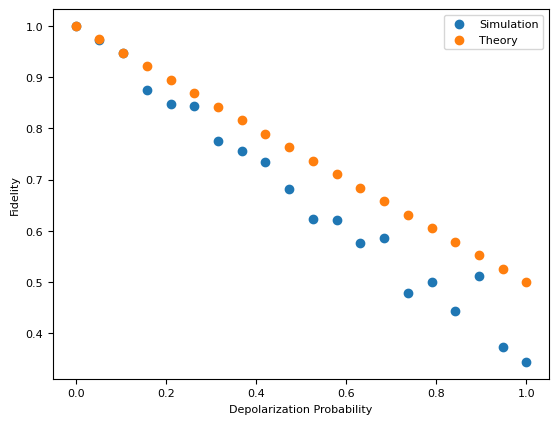

In [ ]:
plt.scatter(depol_probabilities, fidelities, label = 'Simulation')

theoretical_fidelities = [1 - p/2 for p in depol_probabilities]
plt.scatter(depol_probabilities, theoretical_fidelities, label = 'Theory')

plt.xlabel('Depolarization Probability')
plt.ylabel('Fidelity')

plt.legend()
plt.show()

#### **Problem #2.2.5**

**Together**, let's now attempt this experiment in a *more realistic* way: with noise on the whole circuit.

<br>

**NOTE**: This simulation takes a noticeably longer time, so we have decreased the number of repetitions per simulation from 1000 to 100 making our simulation 10 times faster (but less precise). We are *just* starting to push the limits of how complex we can make our simulations before we need an actual quantum computer!

In [ ]:
noisy_fidelities = []

for prob in depol_probabilities:

  # 1. PREPARE QUBITS
  #===================
  # Create qubits
  q0 = cirq.NamedQubit('state 0')
  q1 = cirq.NamedQubit('state 1')
  ancilla = cirq.NamedQubit('anc')

  # Prepare the given states
  circuit_0 = cirq.Circuit()
  circuit_0.append(cirq.I(q0))

  circuit_1 = cirq.Circuit()
  circuit_1.append(cirq.I(q1))

  circuit = circuit_0 + circuit_1


  # 2. SWAP TEST CIRCUIT
  #======================
  # Put ancilla in superposition
  circuit.append(cirq.H(ancilla))

  # Controlled-Swap controlled by ancilla and targeting q0 and q1
  circuit.append(cirq.CSWAP(ancilla, q0, q1))

  # Apply an H gate on the ancilla.
  circuit.append(cirq.H(ancilla))

  # Measure ancilla
  circuit.append(cirq.measure(ancilla))



  # 3. RUN CIRCUIT
  #================
  noise = # COMPLETE THIS CODE

  simulator = cirq.Simulator()
  result = simulator.run(circuit.with_noise(# COMPLETE THIS CODE



  # 4. CALCULATE FIDELITY
  #=======================
  prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])
  fidelity = 1 - 2*prob_0

  noisy_fidelities += [fidelity]




# PLOT THE RESULTS
#==================
plt.scatter(depol_probabilities, fidelities, label = 'Simulation')
plt.scatter(depol_probabilities, noisy_fidelities, label = 'Full Noise Simulation')

theoretical_fidelities = [1 - p/2 for p in depol_probabilities]
plt.scatter(depol_probabilities, theoretical_fidelities, label = 'Theory')

plt.xlabel('Depolarization Probability')
plt.ylabel('Fidelity')

plt.legend()
plt.show()

###### **Solution**

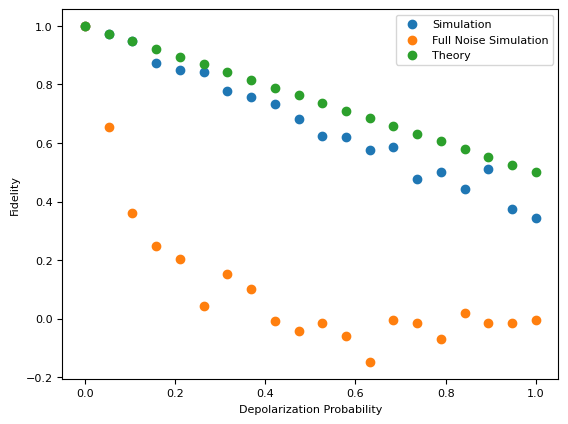

In [ ]:
noisy_fidelities = []

for prob in depol_probabilities:

  # 1. PREPARE QUBITS
  #===================
  # Create qubits
  q0 = cirq.NamedQubit('state 0')
  q1 = cirq.NamedQubit('state 1')
  ancilla = cirq.NamedQubit('anc')

  # Prepare the given states
  circuit_0 = cirq.Circuit()
  circuit_0.append(cirq.I(q0))

  circuit_1 = cirq.Circuit()
  circuit_1.append(cirq.I(q1))

  circuit = circuit_0 + circuit_1


  # 2. SWAP TEST CIRCUIT
  #======================
  # Put ancilla in superposition
  circuit.append(cirq.H(ancilla))

  # Controlled-Swap controlled by ancilla and targeting q0 and q1
  circuit.append(cirq.CSWAP(ancilla, q0, q1))

  # Apply an H gate on the ancilla.
  circuit.append(cirq.H(ancilla))

  # Measure ancilla
  circuit.append(cirq.measure(ancilla))



  # 3. RUN CIRCUIT
  #================
  noise = cirq.depolarize(prob)

  simulator = cirq.Simulator()
  result = simulator.run(circuit.with_noise(noise), repetitions=500)



  # 4. CALCULATE FIDELITY
  #=======================
  prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])
  fidelity = 1 - 2*prob_0

  noisy_fidelities += [fidelity]




# PLOT THE RESULTS
#==================
plt.scatter(depol_probabilities, fidelities, label = 'Simulation')
plt.scatter(depol_probabilities, noisy_fidelities, label = 'Full Noise Simulation')

theoretical_fidelities = [1 - p/2 for p in depol_probabilities]
plt.scatter(depol_probabilities, theoretical_fidelities, label = 'Theory')

plt.xlabel('Depolarization Probability')
plt.ylabel('Fidelity')

plt.legend()
plt.show()

#End of notebook
---
© 2024 The Coding School, All rights reserved